In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [19]:
train=pd.read_csv("C:/Nithya/MSDS/Term5/QTW/CaseStudies/Final/final_project.csv",nrows=128000,header=0) # 160001

In [20]:
test=pd.read_csv("C:/Nithya/MSDS/Term5/QTW/CaseStudies/Final/final_project.csv",nrows=32000,skiprows=128000,header=0)

In [23]:
data =pd.read_csv("C:/Nithya/MSDS/Term5/QTW/CaseStudies/Final/final_project.csv",header=0) # 160001

In [33]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [35]:
X = data.drop(['y'],axis=1)

In [42]:
X.head()
X.shape

(160000, 50)

In [43]:
Y = data['y']
Y.shape
print("The Feature list is: ", data.columns) 

The Feature list is:  Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')


In [45]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [125]:
df = data

In [50]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [126]:
df = df.rename(columns={'x24': 'region', 'x29': 'month','x30': 'day','x32': 'rate','x37': 'PL'})
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'region', 'x25', 'x26', 'x27', 'x28', 'month',
       'day', 'x31', 'rate', 'x33', 'x34', 'x35', 'x36', 'PL', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'y'],
      dtype='object')

In [127]:
df = df.replace(to_replace='',value=np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0        159974 non-null float64
x1        159975 non-null float64
x2        159962 non-null float64
x3        159963 non-null float64
x4        159974 non-null float64
x5        159963 non-null float64
x6        159974 non-null float64
x7        159973 non-null float64
x8        159979 non-null float64
x9        159970 non-null float64
x10       159957 non-null float64
x11       159970 non-null float64
x12       159964 non-null float64
x13       159969 non-null float64
x14       159966 non-null float64
x15       159965 non-null float64
x16       159974 non-null float64
x17       159973 non-null float64
x18       159960 non-null float64
x19       159965 non-null float64
x20       159962 non-null float64
x21       159971 non-null float64
x22       159973 non-null float64
x23       159953 non-null float64
region    159972 non-null object
x25       159978 non-null float64
x26   

In [65]:
df['month'].unique()
#df = df['month'].replace(to_replace='Dev',value='Dec')
#df = df['month'].replace(to_replace='sept.',value='Sep')
#df = df['month'].replace(to_replace='January',value='Jan')

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [95]:
## Count of nan's in each column in the dataset
count_nan = len(df) - df.count()
count_nan

x0        26
x1        25
x2        38
x3        37
x4        26
x5        37
x6        26
x7        27
x8        21
x9        30
x10       43
x11       30
x12       36
x13       31
x14       34
x15       35
x16       26
x17       27
x18       40
x19       35
x20       38
x21       29
x22       27
x23       47
region    28
x25       22
x26       36
x27       30
x28       35
month     30
day       30
x31       39
rate      31
x33       41
x34       41
x35       30
x36       27
PL        23
x38       31
x39       23
x40       36
x41       40
x42       26
x43       37
x44       40
x45       29
x46       31
x47       37
x48       32
x49       32
y          0
dtype: int64

In [120]:
df_na = df.loc[:,df.isna().any()]
df['y'].describe()
df.groupby(['y'])

In [90]:
#df.loc[np.nan=='true']

In [133]:
df_na = df[pd.isnull(df).any(axis=1)]

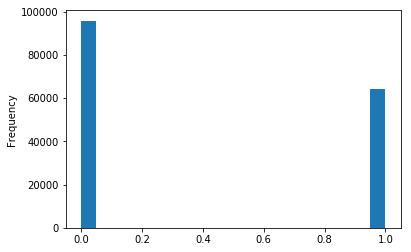

In [149]:
df.y.plot.hist(stacked=True, bins=20)

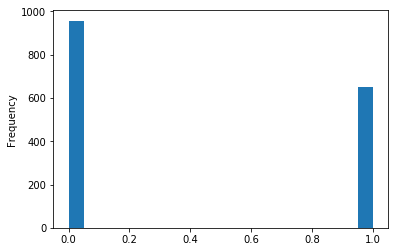

In [148]:
df_na.y.plot.hist(stacked=True, bins=20)

In [134]:
#df=df.dropna()
#df.info()
df_na['y'].describe() ### distro after secluding na's 
df['y'].describe() ## distro before dropping 

## distro of y before and after dropping na rows is same , hence we prefer to drop the rows with na . 

count    1608.000000
mean        0.404851
std         0.491016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

In [135]:
df1 =df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
x0        158392 non-null float64
x1        158392 non-null float64
x2        158392 non-null float64
x3        158392 non-null float64
x4        158392 non-null float64
x5        158392 non-null float64
x6        158392 non-null float64
x7        158392 non-null float64
x8        158392 non-null float64
x9        158392 non-null float64
x10       158392 non-null float64
x11       158392 non-null float64
x12       158392 non-null float64
x13       158392 non-null float64
x14       158392 non-null float64
x15       158392 non-null float64
x16       158392 non-null float64
x17       158392 non-null float64
x18       158392 non-null float64
x19       158392 non-null float64
x20       158392 non-null float64
x21       158392 non-null float64
x22       158392 non-null float64
x23       158392 non-null float64
region    158392 non-null object
x25       158392 non-null float64
x26   

In [136]:
df1['rate'].head()

0      0.0%
1    -0.02%
2    -0.01%
3     0.01%
4     0.01%
Name: rate, dtype: object

In [137]:
df1['rate'] = df1['rate'].str.replace("%", "")
df1['rate'] = df1['rate'].astype("float")
df1['rate'].head()

C:\Users\NithyaDoss\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0.00
1   -0.02
2   -0.01
3    0.01
4    0.01
Name: rate, dtype: float64

In [142]:
df1['PL'].head()

0     $1313.96
1     $1962.78
2      $430.47
3    $-2366.29
4     $-620.66
Name: PL, dtype: object

In [143]:
df1['PL'] = df1['PL'].str.replace("$", "")
df1['PL'] = df1['PL'].astype("float")
df1['PL'].head()

C:\Users\NithyaDoss\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: PL, dtype: float64

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
x0        158392 non-null float64
x1        158392 non-null float64
x2        158392 non-null float64
x3        158392 non-null float64
x4        158392 non-null float64
x5        158392 non-null float64
x6        158392 non-null float64
x7        158392 non-null float64
x8        158392 non-null float64
x9        158392 non-null float64
x10       158392 non-null float64
x11       158392 non-null float64
x12       158392 non-null float64
x13       158392 non-null float64
x14       158392 non-null float64
x15       158392 non-null float64
x16       158392 non-null float64
x17       158392 non-null float64
x18       158392 non-null float64
x19       158392 non-null float64
x20       158392 non-null float64
x21       158392 non-null float64
x22       158392 non-null float64
x23       158392 non-null float64
region    158392 non-null object
x25       158392 non-null float64
x26   

In [145]:
dummyCols = pd.get_dummies(df1.loc[:, df1.dtypes == 'object'])
dummyCols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 20 columns):
region_america    158392 non-null uint8
region_asia       158392 non-null uint8
region_euorpe     158392 non-null uint8
month_Apr         158392 non-null uint8
month_Aug         158392 non-null uint8
month_Dev         158392 non-null uint8
month_Feb         158392 non-null uint8
month_January     158392 non-null uint8
month_July        158392 non-null uint8
month_Jun         158392 non-null uint8
month_Mar         158392 non-null uint8
month_May         158392 non-null uint8
month_Nov         158392 non-null uint8
month_Oct         158392 non-null uint8
month_sept.       158392 non-null uint8
day_friday        158392 non-null uint8
day_monday        158392 non-null uint8
day_thurday       158392 non-null uint8
day_tuesday       158392 non-null uint8
day_wednesday     158392 non-null uint8
dtypes: uint8(20)
memory usage: 4.2 MB


In [146]:
df_final = pd.concat([df1, dummyCols], axis=1)
df_final.drop(['day', 'region', 'month'], axis=1, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
x0                158392 non-null float64
x1                158392 non-null float64
x2                158392 non-null float64
x3                158392 non-null float64
x4                158392 non-null float64
x5                158392 non-null float64
x6                158392 non-null float64
x7                158392 non-null float64
x8                158392 non-null float64
x9                158392 non-null float64
x10               158392 non-null float64
x11               158392 non-null float64
x12               158392 non-null float64
x13               158392 non-null float64
x14               158392 non-null float64
x15               158392 non-null float64
x16               158392 non-null float64
x17               158392 non-null float64
x18               158392 non-null float64
x19               158392 non-null float64
x20               158392 non-null float64
x21    

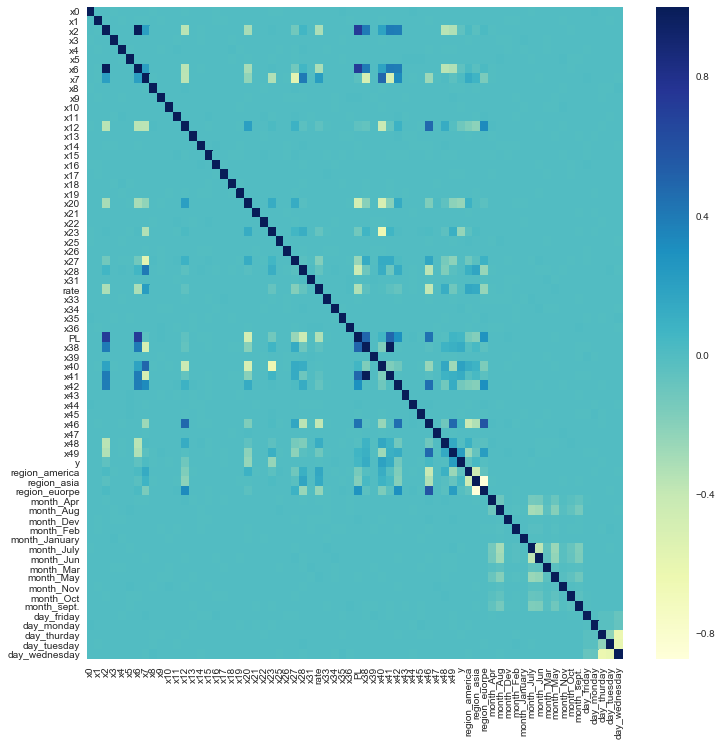

In [155]:
## Heat Map
import seaborn as sns
#sns.palplot(sns.color_palette("husl", 8))
sns.set(rc={'figure.figsize':(12,12)})

corr = df_final.corr()
sns.heatmap(corr, annot=False, cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##### Do the following on full data before splitting train and test. 
1. Clean data , outliers , any replace variables with correct ones / missing data 
2. data exploration - continuous and discrete feautures
3. Summary of data - min max etc 
4. EDA viz based on region , day - on categorical data 
5. correlation of variables w.r.t y(output)
6. One hot encoding 

##### Then do a train ,validation set split using cross fold . 
###### ensemble of RF , NB , DT , LR,  XGB 


In [21]:
rf_Kfold=KFold(n_splits=5)
lr_Kfold=KFold(n_splits=4)
rf=RandomForestClassifier()
train_data=data.iloc[:,1:]
target_data=data.iloc[:,0]

In [22]:
rf_oof_predict=np.zeros(data.shape[0])
for train_idx, test_idx in rf_Kfold.split(data):
    rf.fit(train_data.loc[train_idx],target_data.loc[train_idx])
    rf_oof_predict[test_idx]=rf.predict_proba(train_data.loc[test_idx])[:,1]
    print("Fold ROC score is %f" % roc_auc_score(target_data[test_idx],rf_oof_predict[test_idx]))
    

Fold ROC score is 0.734856
Fold ROC score is 0.733782
Fold ROC score is 0.733572
Fold ROC score is 0.729510
Fold ROC score is 0.725742


In [23]:
lr=LogisticRegression()
lr_oof_predict=np.zeros(data.shape[0])
for train_idx, test_idx in lr_Kfold.split(data):
    lr.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    lr_oof_predict[test_idx]=lr.predict_proba(train_data.loc[test_idx])[:,1]
    print("Fold ROC score is %f" % roc_auc_score(target_data[test_idx],lr_oof_predict[test_idx]))
    
    
    

Fold ROC score is 0.687455
Fold ROC score is 0.681206
Fold ROC score is 0.675599
Fold ROC score is 0.676999


In [9]:
rf_oof_predict

array([0.9, 0.8, 0.7, ..., 0.1, 0.5, 0.8])

In [24]:
from sklearn.linear_model import LinearRegression
stage2=LinearRegression()


In [25]:
stage2_data=pd.DataFrame({'RF_data':rf_oof_predict,'Log_Data':lr_oof_predict})

In [26]:
stage2_data

,RF_data,Log_Data
0,0.8,0.623785
1,0.8,0.621718
2,0.9,0.681501
3,0.8,0.599843
4,0.7,0.492166
5,0.1,0.436956
6,0.8,0.659486
7,0.7,0.645068
8,0.5,0.898230
9,0.9,0.695113


In [27]:
stage2.fit(stage2_data,target_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
stage2.coef_

array([0.67966431, 0.52413764])

In [29]:
lr.fit(train_data,target_data)
rf.fit(train_data,target_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
test_lr=lr.predict_proba(test.loc[:,1:])[:,1]
print("Log Reg score is %f" % roc_auc_score(test.loc[:,0],test_lr))
test_rf=rf.predict_proba(test.loc[:,1:])[:,1]
print("RF score is %f" % roc_auc_score(test.loc[:,0],test_rf))
test_s2=pd.DataFrame({'RF data':test_rf,'Log Data':test_lr})
test_stage2=stage2.predict(test_s2)
print("Final Stage score is % f" % roc_auc_score(test.loc[:,0],test_stage2))

Log Reg score is 0.683865
RF score is 0.742051
Final Stage score is  0.756542


In [ ]:
data.shape

In [ ]:
rf.fit(train_data,target_data)
lr.fit(train_data,target_data)

In [17]:
rf_preds=rf.predict_proba(train_data)[:,1]
lr_preds=lr.predict_proba(train_data)[:,1]
train_data_s2=pd.DataFrame({'RF data':rf_preds,'Log Data':lr_preds})
stage2.fit(train_data_s2,target_data)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
rf_test=rf.predict_proba(test.loc[:,1:])[:,1]
print("RF score is %f" % roc_auc_score(test.loc[:,0],rf_test))
lr_test=lr.predict_proba(test.loc[:,1:])[:,1]
print("Log Reg score is %f" % roc_auc_score(test.loc[:,0],lr_test))
test_data_s2=pd.DataFrame({'RF data':rf_test,'Log Data':lr_test})
final=stage2.predict(test_data_s2)
print("Final score is %f" % roc_auc_score(test.loc[:,0],final))

RF score is 0.717866
Log Reg score is 0.677535
Final score is 0.706069


In [ ]:
test_s2['target']=target_data

In [ ]:
test_s2